In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import cv2

In [2]:
!pip install numpy==1.25.1

In [3]:
np.__version__

'1.25.1'

In [4]:
!pip install opencv-python==4.7.0.68

In [5]:
cv2.__version__

'4.7.0'

In [6]:
from google.colab.patches import cv2_imshow

Image Size : (450, 600, 3)


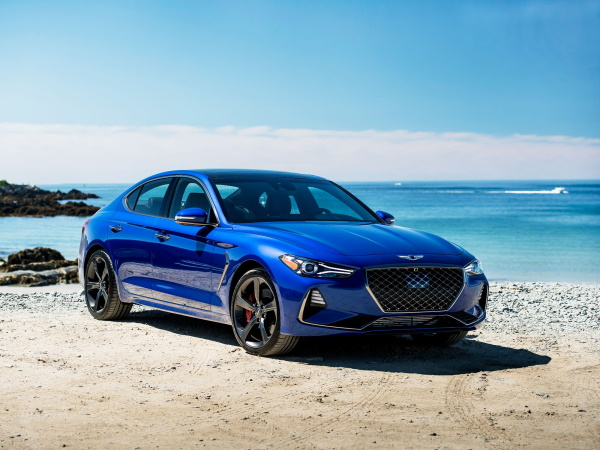

In [7]:
car_image = cv2.imread('car_image.jpg')

print(f'Image Size : {car_image.shape}')
cv2_imshow(car_image)

Entire yolov3 Model Development

original_car_image_size:(450, 600, 3)
afterconverting_car_image_size:(1, 3, 320, 320)
total layer names : ('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 

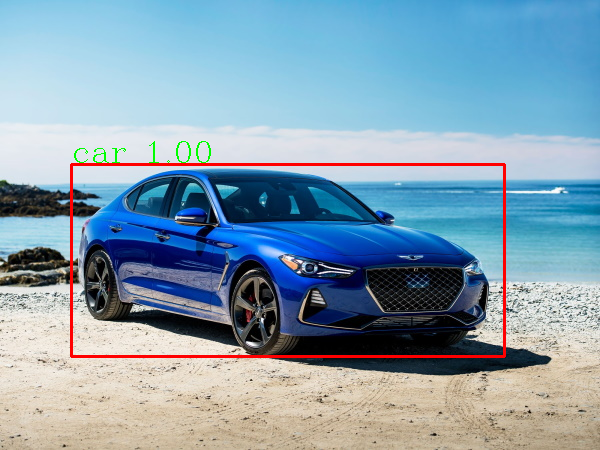

In [10]:
# first load cfg[arch] and weights[80 classes trained information]
Neural_Network = cv2.dnn.readNetFromDarknet('/content/yolov3.cfg','/content/drive/MyDrive/DS_DA_APRIL_/kamal_class_work/Deep_Learning/CNN/Yolov3/yolov3.weights')

Threashold = 0.5
image_size = 320

def finaldetection(t_box,t_p,t_c_i,f_b,oh,ow):
  for k in f_b:
    final_box_plot = t_box[k]
    final_probability_plot = t_p[k]
    class_name_pred = t_c_i[k]
    x,y,w,h = final_box_plot[0],final_box_plot[1],final_box_plot[2],final_box_plot[3]
    x = int(x * ow)
    y = int(y * oh)
    w = int(w * ow)
    h = int(h * oh)

    cv2.rectangle(car_image,(x,y),(x+w,y+h),(0,0,255),2)
    print("{:.2f}".format(final_probability_plot))
    print(class_names[class_name_pred])

    s = str(class_names[class_name_pred]) +" "+ str("{:.2f}".format(final_probability_plot))
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(car_image,s,(x,y-2),font,1,(0,255,0),1)


def boxes(prediction_boxes):
  bounding_boxes = []
  pred_class_index = []
  class_confidence = []

  for i in prediction_boxes: # i = 300
    for j in i:
      _80_class_prob = j[5:]
      _80_class_index = np.argmax(_80_class_prob)
      class_prob = _80_class_prob[_80_class_index]

      if class_prob > Threashold:
       w,h = int(j[2] * image_size) , int(j[3] * image_size)
       x , y = int(j[0] * image_size - w / 2) , int(j[1] * image_size - h / 2)

       bounding_boxes.append([x,y,w,h])
       pred_class_index.append(_80_class_index)
       class_confidence.append(class_prob)

  final_box = cv2.dnn.NMSBoxes(bounding_boxes,class_confidence,Threashold,0.6)
  return bounding_boxes,class_confidence,pred_class_index,final_box

# take coco classes [80 classes]
class_names = []
k = open('class_names','r')
for i in k.readlines():
  class_names.append(i.strip())

# giving the car image to yolov3 architecture and weights are pre-trained weights [with coco dataset]

car_image = cv2.imread('car_image.jpg')
print(f'original_car_image_size:{car_image.shape}')

original_height,original_width = car_image.shape[0],car_image.shape[1]

blob = cv2.dnn.blobFromImage(car_image,1/255,(320,320),True,crop=False)
print(f'afterconverting_car_image_size:{blob.shape}')

# know giving the blob_image to Neural_Network

Neural_Network.setInput(blob)

cfg_data = Neural_Network.getLayerNames()
print(f'total layer names : {cfg_data}')

layer_names = Neural_Network.getUnconnectedOutLayers()
print(f'3_outcome names : {layer_names}')

outputs = [cfg_data[i-1] for i in layer_names]
print(outputs)


output_data = Neural_Network.forward(outputs)

print(f'yolo_82 : {output_data[0].shape}')
print(f'yolo_94 : {output_data[1].shape}')
print(f'yolo_106 : {output_data[2].shape}')

bond_boxes,box_pro,_80_class_index,final_box = boxes(output_data)

print(f'total boxes above threshold : {bond_boxes}')
print(f'Each box probability : {box_pro}')
print(f'Each box class index : {_80_class_index}')

print('---------------------------------------')

print(f'FInal Box : {final_box}')

finaldetection(bond_boxes,box_pro,_80_class_index,final_box,original_height/320,original_width/320)

cv2_imshow(car_image)

original_car_image_size:(720, 1280, 3)
afterconverting_car_image_size:(1, 3, 320, 320)
total layer names : ('conv_0', 'bn_0', 'mish_1', 'conv_1', 'bn_1', 'mish_2', 'conv_2', 'bn_2', 'mish_3', 'identity_3', 'conv_4', 'bn_4', 'mish_5', 'conv_5', 'bn_5', 'mish_6', 'conv_6', 'bn_6', 'mish_7', 'shortcut_7', 'conv_8', 'bn_8', 'mish_9', 'concat_9', 'conv_10', 'bn_10', 'mish_11', 'conv_11', 'bn_11', 'mish_12', 'conv_12', 'bn_12', 'mish_13', 'identity_13', 'conv_14', 'bn_14', 'mish_15', 'conv_15', 'bn_15', 'mish_16', 'conv_16', 'bn_16', 'mish_17', 'shortcut_17', 'conv_18', 'bn_18', 'mish_19', 'conv_19', 'bn_19', 'mish_20', 'shortcut_20', 'conv_21', 'bn_21', 'mish_22', 'concat_22', 'conv_23', 'bn_23', 'mish_24', 'conv_24', 'bn_24', 'mish_25', 'conv_25', 'bn_25', 'mish_26', 'identity_26', 'conv_27', 'bn_27', 'mish_28', 'conv_28', 'bn_28', 'mish_29', 'conv_29', 'bn_29', 'mish_30', 'shortcut_30', 'conv_31', 'bn_31', 'mish_32', 'conv_32', 'bn_32', 'mish_33', 'shortcut_33', 'conv_34', 'bn_34', 'mish_

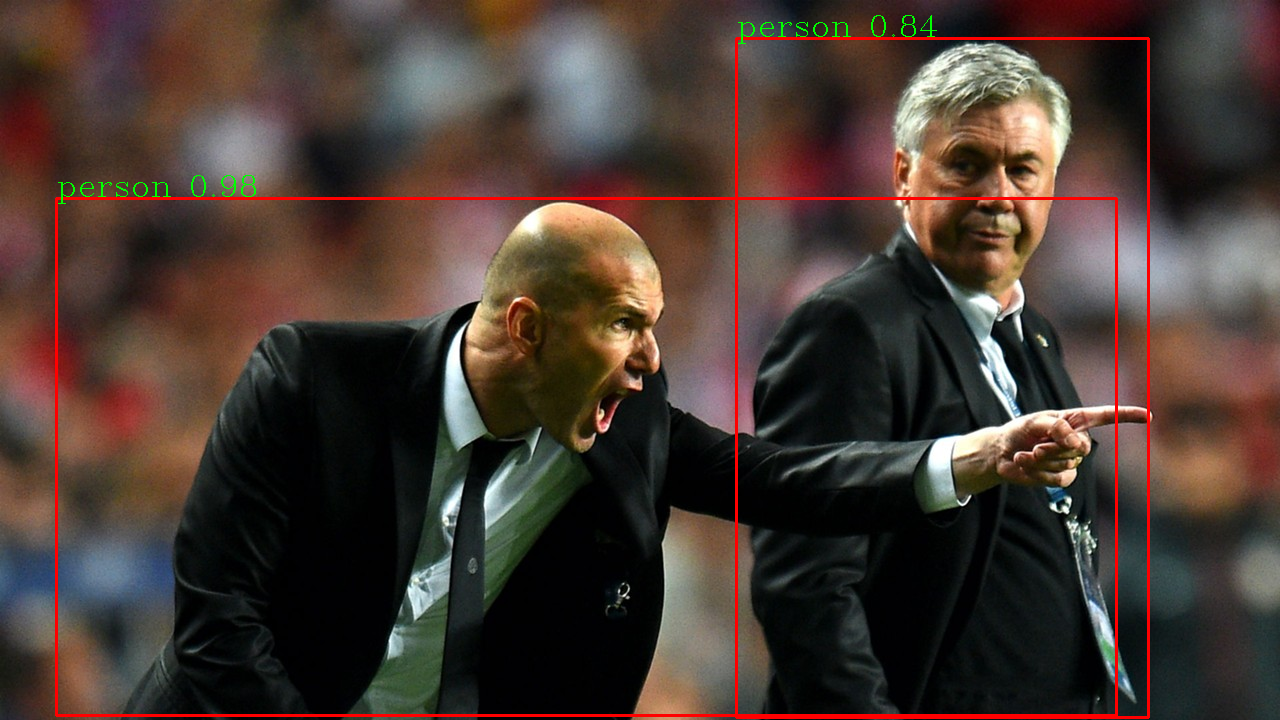

In [12]:

# yolov4




# first load cfg[arch] and weights[80 classes trained information]
Neural_Network = cv2.dnn.readNetFromDarknet('/content/drive/MyDrive/DS_DA_APRIL_/kamal_class_work/Deep_Learning/CNN/Yolov3/yolov4.cfg',
                                            '/content/drive/MyDrive/DS_DA_APRIL_/kamal_class_work/Deep_Learning/CNN/Yolov3/yolov4.weights')

Threashold = 0.5
image_size = 320

def finaldetection(t_box,t_p,t_c_i,f_b,oh,ow):
  for k in f_b:
    final_box_plot = t_box[k]
    final_probability_plot = t_p[k]
    class_name_pred = t_c_i[k]
    x,y,w,h = final_box_plot[0],final_box_plot[1],final_box_plot[2],final_box_plot[3]
    x = int(x * ow)
    y = int(y * oh)
    w = int(w * ow)
    h = int(h * oh)

    cv2.rectangle(car_image,(x,y),(x+w,y+h),(0,0,255),2)
    print("{:.2f}".format(final_probability_plot))
    print(class_names[class_name_pred])

    s = str(class_names[class_name_pred]) +" "+ str("{:.2f}".format(final_probability_plot))
    font = cv2.FONT_HERSHEY_COMPLEX
    cv2.putText(car_image,s,(x,y-2),font,1,(0,255,0),1)


def boxes(prediction_boxes):
  bounding_boxes = []
  pred_class_index = []
  class_confidence = []

  for i in prediction_boxes: # i = 300
    for j in i:
      _80_class_prob = j[5:]
      _80_class_index = np.argmax(_80_class_prob)
      class_prob = _80_class_prob[_80_class_index]

      if class_prob > Threashold:
       w,h = int(j[2] * image_size) , int(j[3] * image_size)
       x , y = int(j[0] * image_size - w / 2) , int(j[1] * image_size - h / 2)

       bounding_boxes.append([x,y,w,h])
       pred_class_index.append(_80_class_index)
       class_confidence.append(class_prob)

  final_box = cv2.dnn.NMSBoxes(bounding_boxes,class_confidence,Threashold,0.6)
  return bounding_boxes,class_confidence,pred_class_index,final_box

# take coco classes [80 classes]
class_names = []
k = open('class_names','r')
for i in k.readlines():
  class_names.append(i.strip())

# giving the car image to yolov3 architecture and weights are pre-trained weights [with coco dataset]

car_image = cv2.imread('zidane.jpg')
print(f'original_car_image_size:{car_image.shape}')

original_height,original_width = car_image.shape[0],car_image.shape[1]

blob = cv2.dnn.blobFromImage(car_image,1/255,(320,320),True,crop=False)
print(f'afterconverting_car_image_size:{blob.shape}')

# know giving the blob_image to Neural_Network

Neural_Network.setInput(blob)

cfg_data = Neural_Network.getLayerNames()
print(f'total layer names : {cfg_data}')

layer_names = Neural_Network.getUnconnectedOutLayers()
print(f'3_outcome names : {layer_names}')

outputs = [cfg_data[i-1] for i in layer_names]
print(outputs)


output_data = Neural_Network.forward(outputs)

print(f'yolo_82 : {output_data[0].shape}')
print(f'yolo_94 : {output_data[1].shape}')
print(f'yolo_106 : {output_data[2].shape}')

bond_boxes,box_pro,_80_class_index,final_box = boxes(output_data)

print(f'total boxes above threshold : {bond_boxes}')
print(f'Each box probability : {box_pro}')
print(f'Each box class index : {_80_class_index}')

print('---------------------------------------')

print(f'FInal Box : {final_box}')

finaldetection(bond_boxes,box_pro,_80_class_index,final_box,original_height/320,original_width/320)

cv2_imshow(car_image)
